In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.

In [2]:
# reading the dataset

train = pd.read_csv('C:/Users/akshaya bandaru/Downloads/6.house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/akshaya bandaru/Downloads/6.house-prices-advanced-regression-techniques/test.csv')

# checking the shapes of the train and test datasets
print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [3]:
# making copies of train and test

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

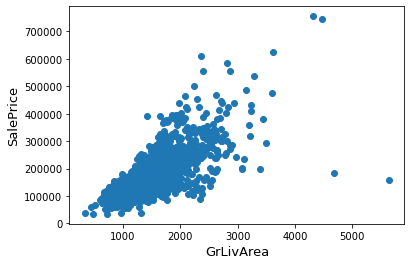

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()



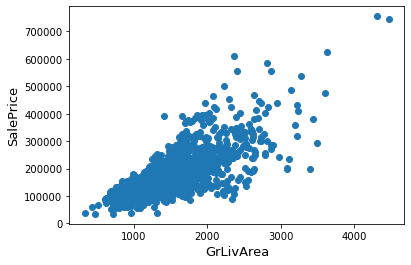

In [5]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


mu = 180932.92 and sigma = 79467.79


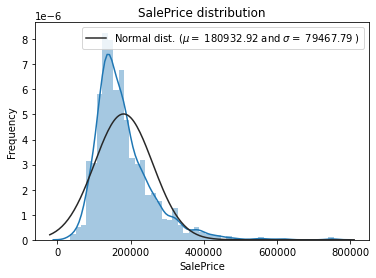

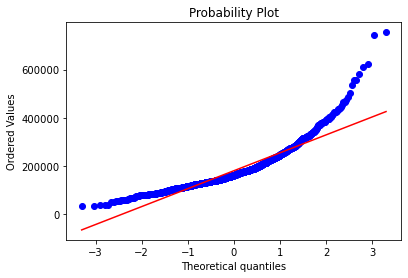

In [6]:
# target variable

from scipy import stats
from scipy.stats import norm

sns.distplot(train['SalePrice'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

mu = 12.02 and sigma = 0.40


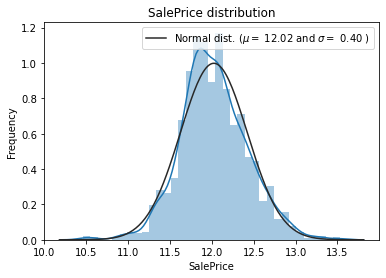

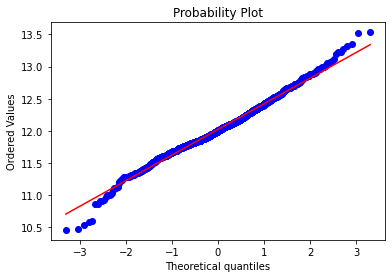

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

In [8]:
# combining the train and test datasets for preprocessing

ntrain = train.shape[0]
ntest = test.shape[0]

# creating y-train
y_train = train.SalePrice.values

combine = pd.concat([train, test])
combine.drop(['SalePrice'], axis = 1, inplace =  True)

# printing the shape of new dataset
combine.shape

(2917, 79)

In [9]:
combine_na = (combine.isnull().sum() / len(combine)) * 100
combine_na = combine_na.drop(combine_na[combine_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :combine_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


In [10]:
# checking is there are any NULL values in the train and test sets

combine.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [11]:
# ## filling the missing values in the Column Types of BsmtFinSF2

# simply filling the NULL value with none
combine['BsmtFinSF2'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtFinSF2'].isnull().any()

False

In [12]:
# ## filling the missing values in the Column Types of BsmtFinSF1

# simply filling the NULL value with none
combine['BsmtFinSF1'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtFinSF1'].isnull().any()

False

In [13]:
# ## filling the missing values in the Column Types of BsmtFinType2

# simply filling the NULL value with none
combine['BsmtFinType2'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['BsmtFinType2'].isnull().any()

False

In [14]:
# ## filling the missing values in the Column Types of BsmtFinType1

# simply filling the NULL value with none
combine['BsmtFinType1'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['BsmtFinType1'].isnull().any()

False

In [15]:
# ## filling the missing values in the Column Types of BsmtFullBath

# simply filling the NULL value with 0 as it is the most common
combine['BsmtFullBath'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtFullBath'].isnull().any()

False

In [16]:
# ## filling the missing values in the Column Types of BsmtHalfBath

# simply filling the NULL value with 0 as it is the most common
combine['BsmtHalfBath'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtHalfBath'].isnull().any()

False

In [17]:
# ## filling the missing values in the Column Types of BsmtQual

# simply filling the NULL value with none
combine['BsmtQual'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['BsmtQual'].isnull().any()

False

In [18]:
# ## filling the missing values in the Column Types of BsmtUnfSF

# simply filling the NULL value with 0 as it is the most common
combine['BsmtUnfSF'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtUnfSF'].isnull().any()

False

In [19]:
## filling the missing values in the Column Types of Electrical

# simply filling the NULL value with VinylSd as it is the most common
combine['Electrical'].fillna(combine['Electrical'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['Electrical'].isnull().any()

False

In [20]:
## filling the missing values in the Column Types of Exterior2nd

# simply filling the NULL value with VinylSd as it is the most common
combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['Exterior1st'].isnull().any()

False

In [21]:
## filling the missing values in the Column Types of Exterior2nd

# simply filling the NULL value with most common value
combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['Exterior2nd'].isnull().any()

False

In [22]:
## filling the missing values in the Column Types of Fence

# simply filling the NULL value with none
combine['Fence'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['Fence'].isnull().any()

False

In [23]:
## filling the missing values in the Column Types of FireplaceQu

# simply filling the NULL value with none
combine['FireplaceQu'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['FireplaceQu'].isnull().any()

False

In [24]:
## filling the missing values in the Column Types of MSZoning

# simply filling the NULL value with none
combine['MSZoning'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['MSZoning'].isnull().any()

False

In [25]:
## filling the missing values in the Column Types of MasVnrArea

# simply filling the NULL value with 0
combine['MasVnrArea'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['MasVnrArea'].isnull().any()

False

In [26]:
## filling the missing values in the Column Types of MasVnrType

# simply filling the NULL value with none
combine['MasVnrType'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['MasVnrType'].isnull().any()

False

In [27]:
## filling the missing values in the Column Types of MiscFeature

# simply filling the NULL value with none
combine['MiscFeature'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['MiscFeature'].isnull().any()

False

In [28]:
## filling the missing values in the Column Typesof PoolQC

# simply filling the NULL value with Ex as it is the most common
combine['PoolQC'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['PoolQC'].isnull().any()

False

In [29]:
## filling the missing values in the Column SaleType

# simply filling the NULL value with WD as it is the most common
combine['SaleType'].fillna(combine['SaleType'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['SaleType'].isnull().any()

False

In [30]:
# filling the missing values in the Column TotalBsmtSF

combine['TotalBsmtSF'].fillna(combine['TotalBsmtSF'].mean(), inplace = True)

# checking if there are any Null values left
combine['TotalBsmtSF'].isnull().any()

False

In [31]:
# checking the unique value in the column Utlities

combine['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
# AS, we just saw that almost all the rows have same value for Utilities we will get rid of this column

combine.drop(['Utilities'], axis = 1, inplace = True)

# checking the new shape of the dataset
combine.shape

(2917, 78)

In [33]:
# filling the missing values in the LotFrontage column

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
combine["LotFrontage"] = combine.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# checking if there are any NULL values left in the LotFronage Column
combine['LotFrontage'].isnull().any()


False

In [34]:
# filling the missing values 

# we will replace null values with none
combine['Alley'].fillna('None', inplace = True)

# checking if there are any NULL values left
combine['Alley'].isnull().any()

False

In [35]:
# filling the missing values in the BsmtCond column

# we are simply filling none in the place NULL values 
combine['BsmtCond'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['BsmtCond'].isnull().any()

False

In [36]:
# filling the missing values in the BsmtCond column

# replacing No with None
combine['BsmtExposure'].replace(('No'), ('None'), inplace = True)

# we are simply filling None in the place NULL values 
combine['BsmtExposure'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['BsmtExposure'].isnull().any()

False

In [37]:
combine['KitchenQual'].value_counts(dropna = False)

TA     1492
Gd     1151
Ex      203
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [38]:
# filling the missing values in the KitchenQual column

# we are simply filling TA in the place NULL values 
combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0], inplace = True)

# checking if there are any left NULL values
combine['KitchenQual'].isnull().any()

False

In [39]:
# filling the missing values in the GarageYrBlt column

# we are simply filling none in place of NULL values
combine['GarageYrBlt'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageYrBlt'].isnull().any()

False

In [40]:
# filling the missing values in the GarageType column

# we are simply filling none in the place NULL values 
combine['GarageType'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageType'].isnull().any()

False

In [41]:
# filling the missing values in the GarageQual column

# we are simply filling none in the place NULL values 
combine['GarageQual'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageQual'].isnull().any()

False

In [42]:
# filling the missing values in the GarageFinish column

# we are simply filling none in the place NULL values  
combine['GarageFinish'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageFinish'].isnull().any()

False

In [43]:
# filling the missing values in the GarageCond column

# we are simply filling Unf in the place NULL values 
combine['GarageCond'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageCond'].isnull().any()

False

In [44]:
# filling the missing values in the GarageCars column

# we are simply filling 0 in the place NULL values 
combine['GarageCars'].fillna(0, inplace = True)

# checking if there are any left NULL values
combine['GarageCars'].isnull().any()

False

In [45]:
# filling the missing values in the GarageArea column

# we are simply filling 0 in the place NULL values 
combine['GarageArea'].fillna(0, inplace = True)

# checking if there are any left NULL values
combine['GarageArea'].isnull().any()

False

In [46]:
# filling the missing values in the Functional column

combine['Functional'].fillna(combine['Functional'].mode()[0], inplace = True)

# checking if there are any left NULL values
combine['Functional'].isnull().any()

False

In [47]:
combine.isnull().sum().sum()

0

In [48]:
# Transforming some numerical variables that are really categorical

#MSSubClass=The building class
combine['MSSubClass'] = combine['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
combine['OverallCond'] = combine['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
combine['YrSold'] = combine['YrSold'].astype(str)
combine['MoSold'] = combine['MoSold'].astype(str)

In [49]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(combine[c].values)) 
    combine[c] = lb.transform(list(combine[c].values))

# shape        
print('Shape all_data: {}'.format(combine.shape))


Shape all_data: (2917, 78)


In [50]:
# FEATURE ENGINEERING
# adding a new column total area as it is big determinant for prices of a home.

combine['total_area'] = combine['1stFlrSF'] + combine['2ndFlrSF'] + combine['TotalBsmtSF']

# looking at the new shape of the combine dataset
combine.shape


(2917, 79)

In [51]:
# finding skewed features

from scipy.stats import skew

numerical_feats = combine.dtypes[combine.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = combine[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(10)

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [52]:
# applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    combine[feat] += 1
    combine[feat] = boxcox1p(combine[feat], lam)
  
combine[skewed_features] = np.log1p(combine[skewed_features])

There are 58 skewed numerical features to box cox transform


In [53]:
# one hot encoding for all the categorical variables

combine = pd.get_dummies(combine)

# checking the head of the dataset
combine.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.389125,1.925642,3.006308,0.785871,0.785871,1.036855,0.548389,1.281654,1.116990,2.720577,...,0,0,0,1,0,0,0,0,1,0
1,1.181627,1.980305,3.030743,0.785871,0.785871,1.036855,0.548389,1.235549,1.281654,2.717784,...,0,0,0,1,0,0,0,0,1,0
2,1.389125,1.937608,3.060939,0.785871,0.785871,0.548389,0.548389,1.281654,1.116990,2.720372,...,0,0,0,1,0,0,0,0,1,0
3,1.417851,1.904295,3.029746,0.785871,0.785871,0.548389,0.548389,1.281654,1.116990,2.711322,...,0,0,0,1,1,0,0,0,0,0
4,1.389125,1.993002,3.105727,0.785871,0.785871,0.548389,0.548389,1.321823,1.116990,2.720269,...,0,0,0,1,0,0,0,0,1,0


In [54]:
# separating the train and test datasets

x_train = combine.iloc[:ntrain]
x_test = combine.iloc[ntrain:]

# checking the shapes of train and test datasets
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (1458, 324)
Shape of test : (1459, 324)


In [55]:
#Validation function
n_folds = 5
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [56]:
# LASSO MODEL
# WITH PIPELINE  and using robust scalerTO AVOID SENSITIVITY TOWARDS OUTLIERS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 3))
lasso.fit(x_train, y_train)


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=3))])

In [57]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1135 (0.0073)



In [58]:
# making an Elastic Net model
from sklearn.linear_model import ElasticNet

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ENet.fit(x_train, y_train)


ElasticNet score: 0.1135 (0.0073)



Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))])

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# making a gradint boosting model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1158 (0.0067)



In [60]:
# making predictions
GBoost.fit(x_train, y_train)
predictions = GBoost.predict(x_test)

In [61]:
# light gradient boosting
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [62]:
predictions = model_lgb.fit(x_train, y_train)

In [63]:
# KERNEL RIDGE REGRESSION

from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1589 (0.0077)



In [64]:
# STACKING
# Simplest model -> Averaging Base Models

from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.base import clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

In [65]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Averaged base models score: 0.1138 (0.0071)



In [67]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [68]:
averaged_models.fit(x_train.values,y_train)
averaged_train_pred=averaged_models.predict(x_train.values)
averaged_pred=np.expm1(averaged_models.predict(x_test.values))
print(rmsle(y_train,averaged_train_pred))

0.08917938716694858


In [69]:
final_pred=pd.DataFrame({'Id':test_ID,'saleprice':averaged_pred})

In [70]:
final_pred.head()

,Id,saleprice
0,1461,119906.784155
1,1462,158760.411672
2,1463,189760.122883
3,1464,201347.733637
4,1465,191238.736100


In [72]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

final_pred.to_csv(filename, index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
